In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
training_data=pd.read_csv('Downloads/train_har.csv')
testing_data=pd.read_csv('Downloads/test_har.csv')

In [3]:
print("Training Data: {}".format(training_data.shape))
print("Null values present in train data: {}".format(training_data.isnull().values.any()))

Training Data: (7352, 563)
Null values present in train data: False


In [4]:
print("Test Data: {}".format(testing_data.shape))
print("Null values present in test data: {}".format(testing_data.isnull().values.any()))

Test Data: (2947, 563)
Null values present in test data: False


In [5]:
x_train=training_data.drop(columns=['Activity','subject'])
y_train=training_data['Activity']

In [6]:
x_test=testing_data.drop(columns=['Activity','subject'])
y_test=testing_data['Activity']

([<matplotlib.patches.Wedge at 0x1cf94411df0>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

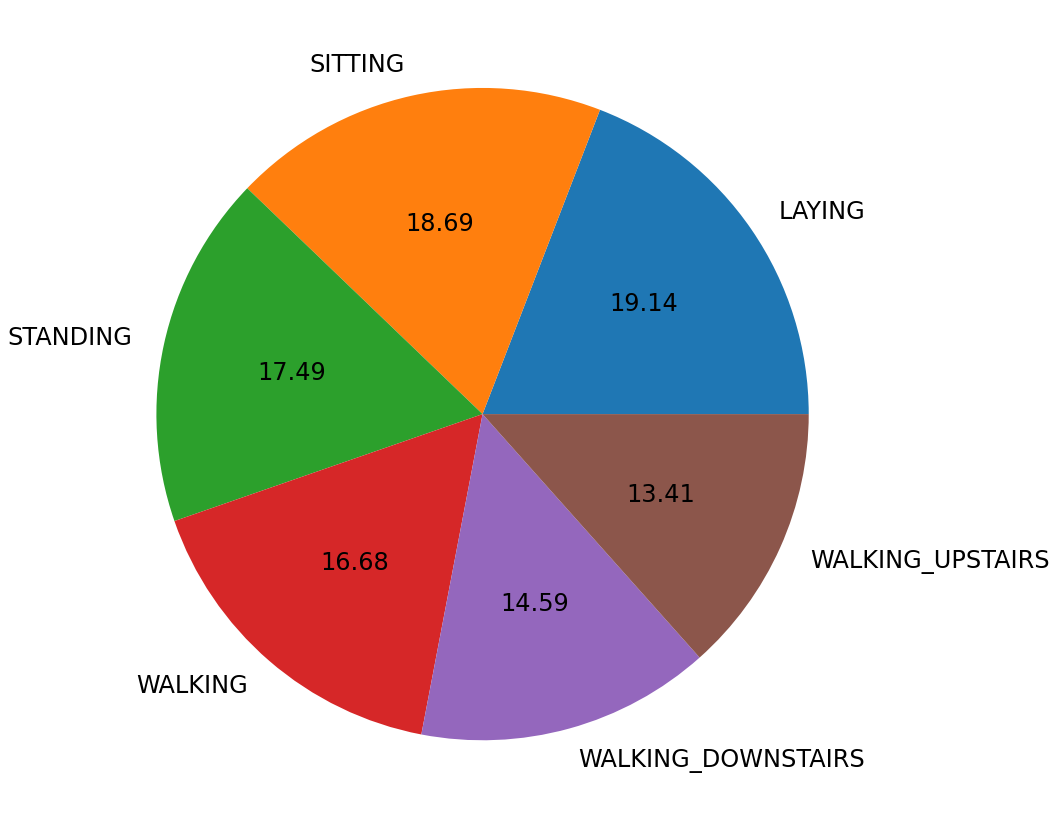

In [8]:
count_of_each_act=np.array(y_train.value_counts())
activities=sorted(y_train.unique())
plt.rcParams.update({'figure.figsize':[15,15],'font.size':24})
plt.pie(count_of_each_act,labels=activities,autopct='%0.2f')

<BarContainer object of 3 artists>

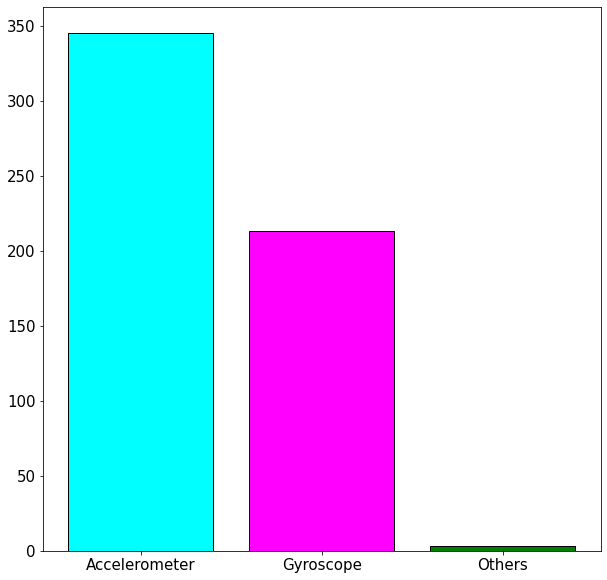

In [11]:
# count for each type

acc=0
gyro=0
others=0
for column in x_train.columns:
    if 'Acc' in str(column):
        acc+=1
    elif 'Gyro' in str(column):
        gyro+=1
    else:
        others+=1

plt.rcParams.update({'figure.figsize':[10,10],'font.size':15})
plt.bar(['Accelerometer','Gyroscope','Others'],[acc,gyro,others],color=('cyan','magenta','green'), edgecolor='black')

In [12]:
standing_activity=training_data[training_data['Activity']=='STANDING']

#resetting index for this df
standing_activity=standing_activity.reset_index(drop=True)

In [13]:
#setting time series for each subject

time=1
index=0
time_series=np.zeros(standing_activity.shape[0])
for row_number in range(standing_activity.shape[0]):
    if(row_number==0 or standing_activity.iloc[row_number]['subject']==standing_activity.iloc[row_number-1]['subject']):
        time_series[index]=time
        time+=1
    else:
        time_series[index]=1
        time=2
    index+=1
time_series_df=pd.DataFrame({'Time': time_series})
standing_activity_df=pd.concat([standing_activity,time_series_df],axis=1)

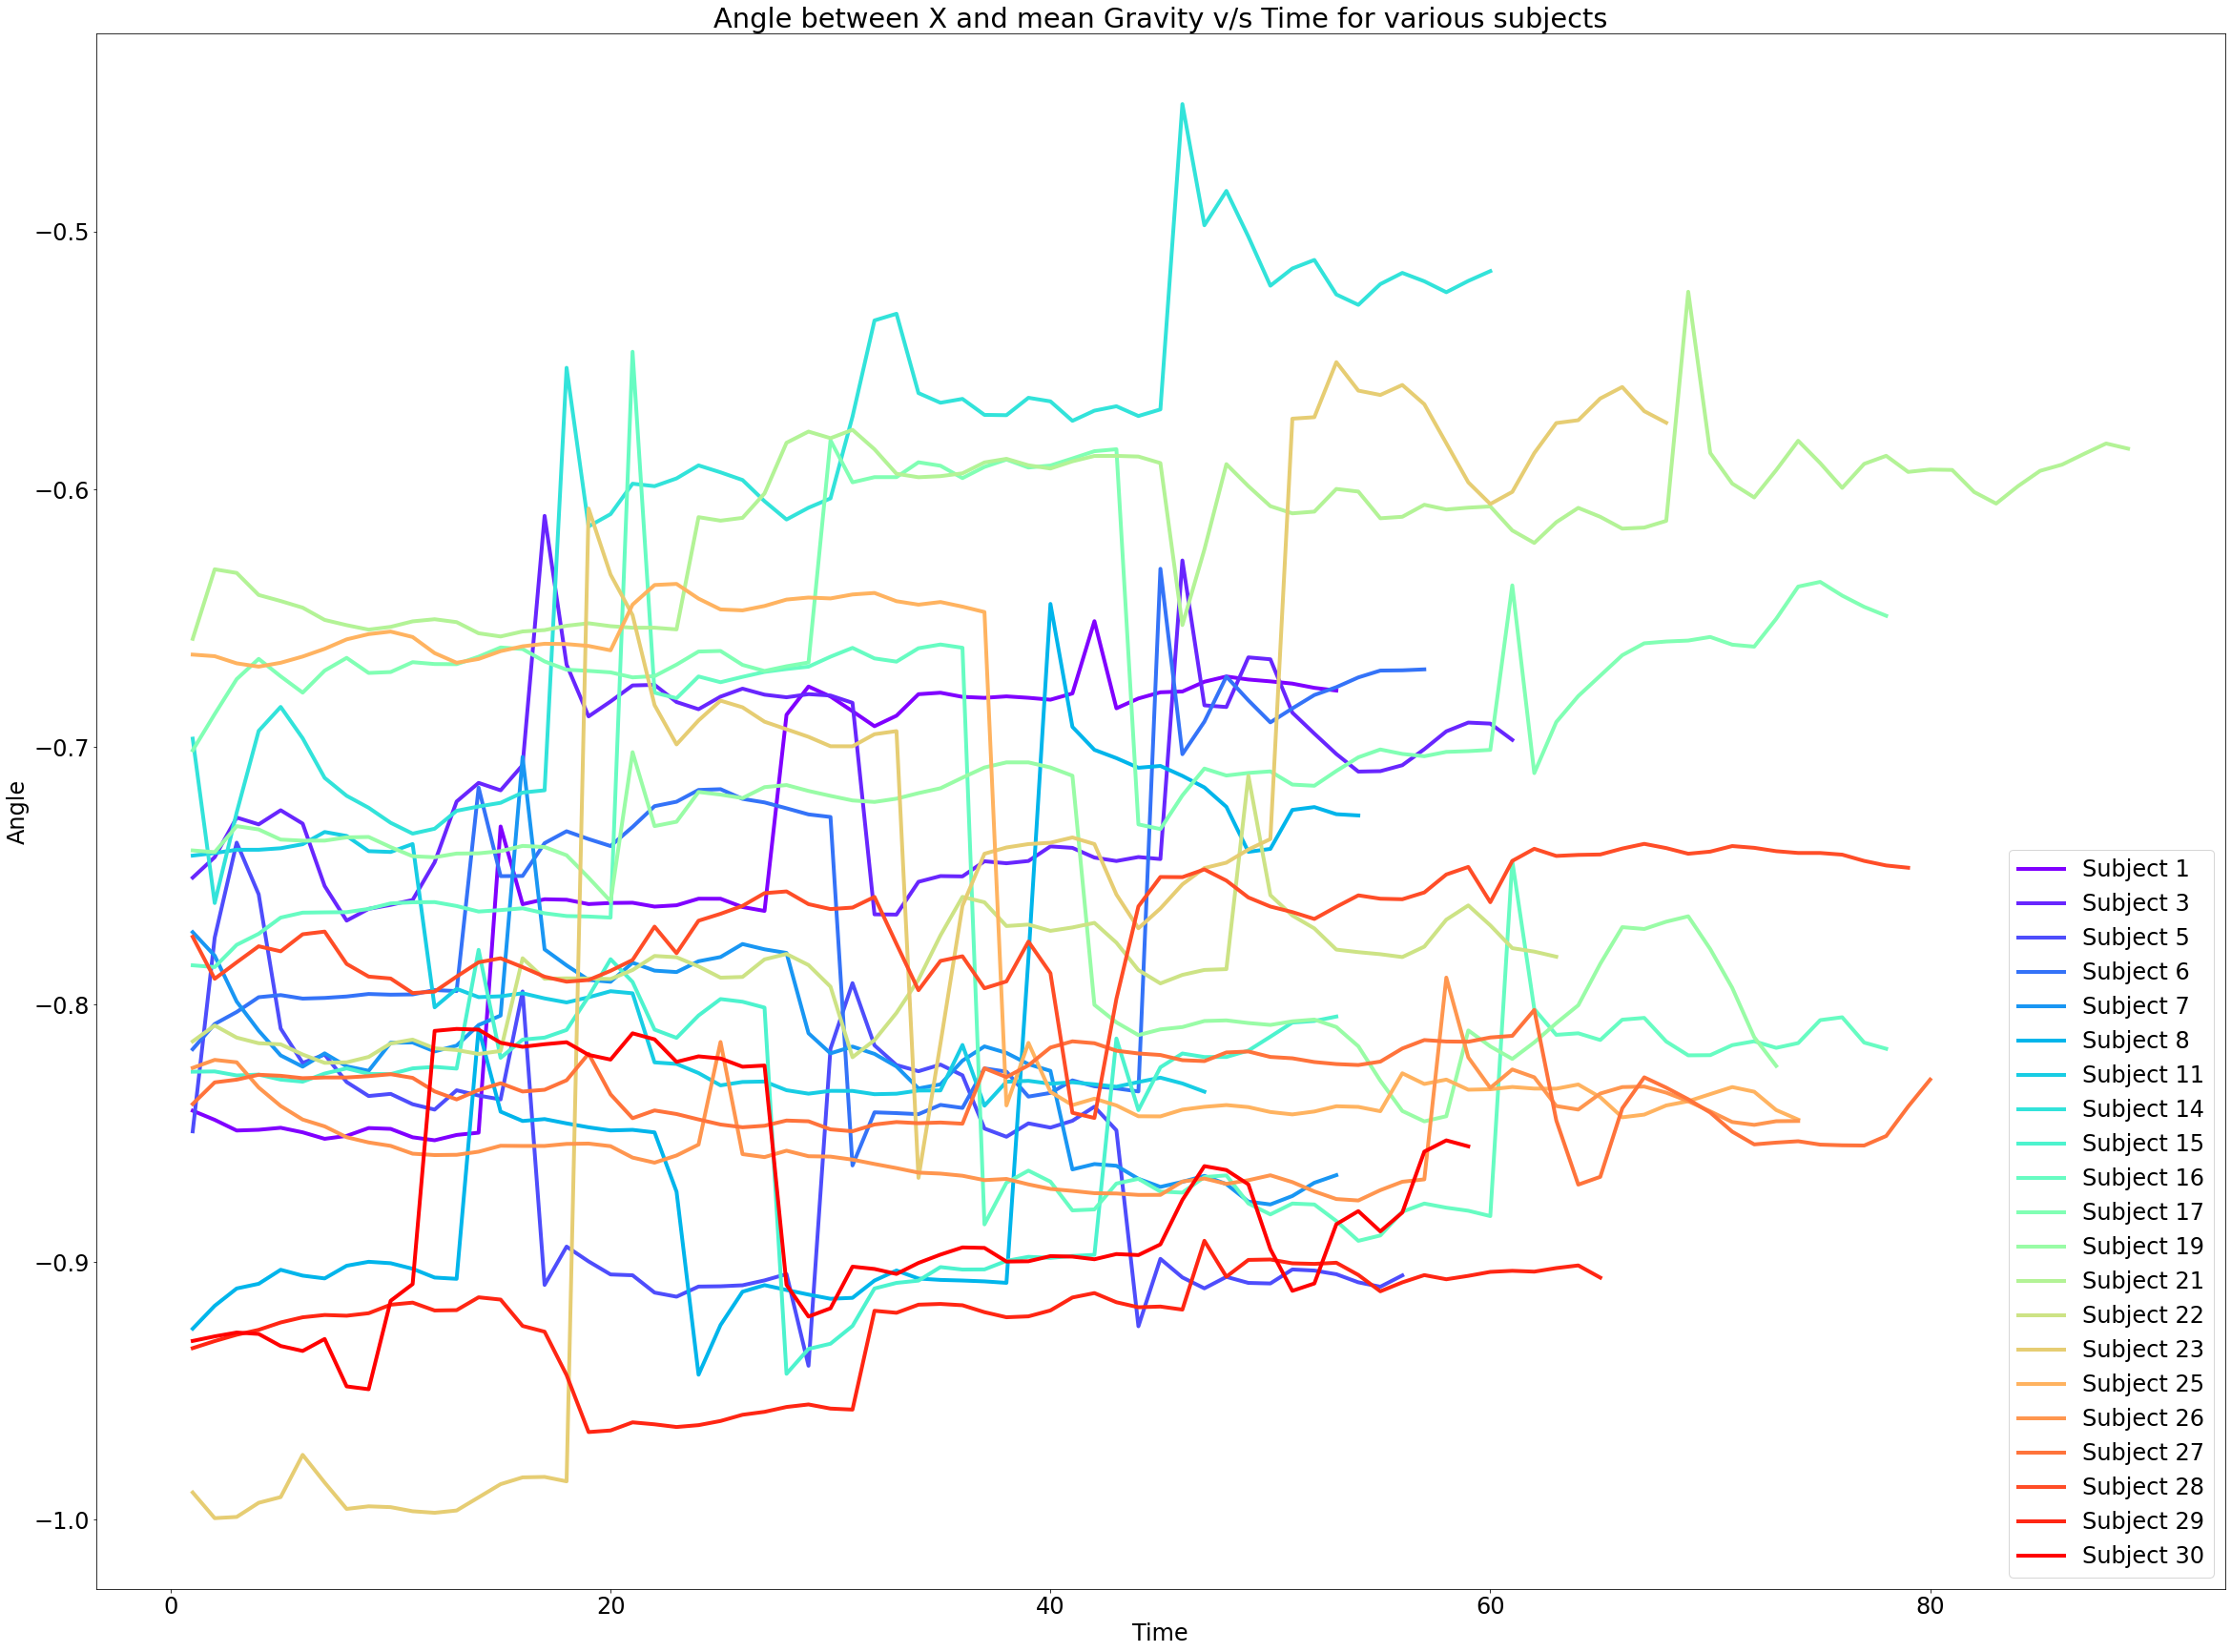

In [15]:
colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))

# Create plot for each subject, which will all be displayed overlapping on one plot
id = 0
for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(standing_activity_df[standing_activity_df['subject'] == subject]['Time'], 
             standing_activity_df[standing_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1

In [16]:
accuracy_scores = np.zeros(4)

In [35]:
from sklearn.metrics import mean_squared_error

accuracy_scores = np.zeros(4)

# Support Vector Classifier
clf = SVC().fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

## Output:
# Support Vector Classifier accuracy: 94.02782490668477%

# Logistic Regression
clf = LogisticRegression().fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

## Output:
# Logistic Regression accuracy: 96.19952494061758%

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

## Output:
# K Nearest Neighbors Classifier accuracy: 90.02375296912113%

# Random Forest
clf = RandomForestClassifier().fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

## Output:
# Random Forest Classifier accuracy: 89.68442483881914%

Support Vector Classifier accuracy: 95.04580929759076%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 95.92806243637597%
K Nearest Neighbors Classifier accuracy: 90.02375296912113%
Random Forest Classifier accuracy: 92.29725144214456%


Text(0.5, 1.0, 'Accuracy of various algorithms')

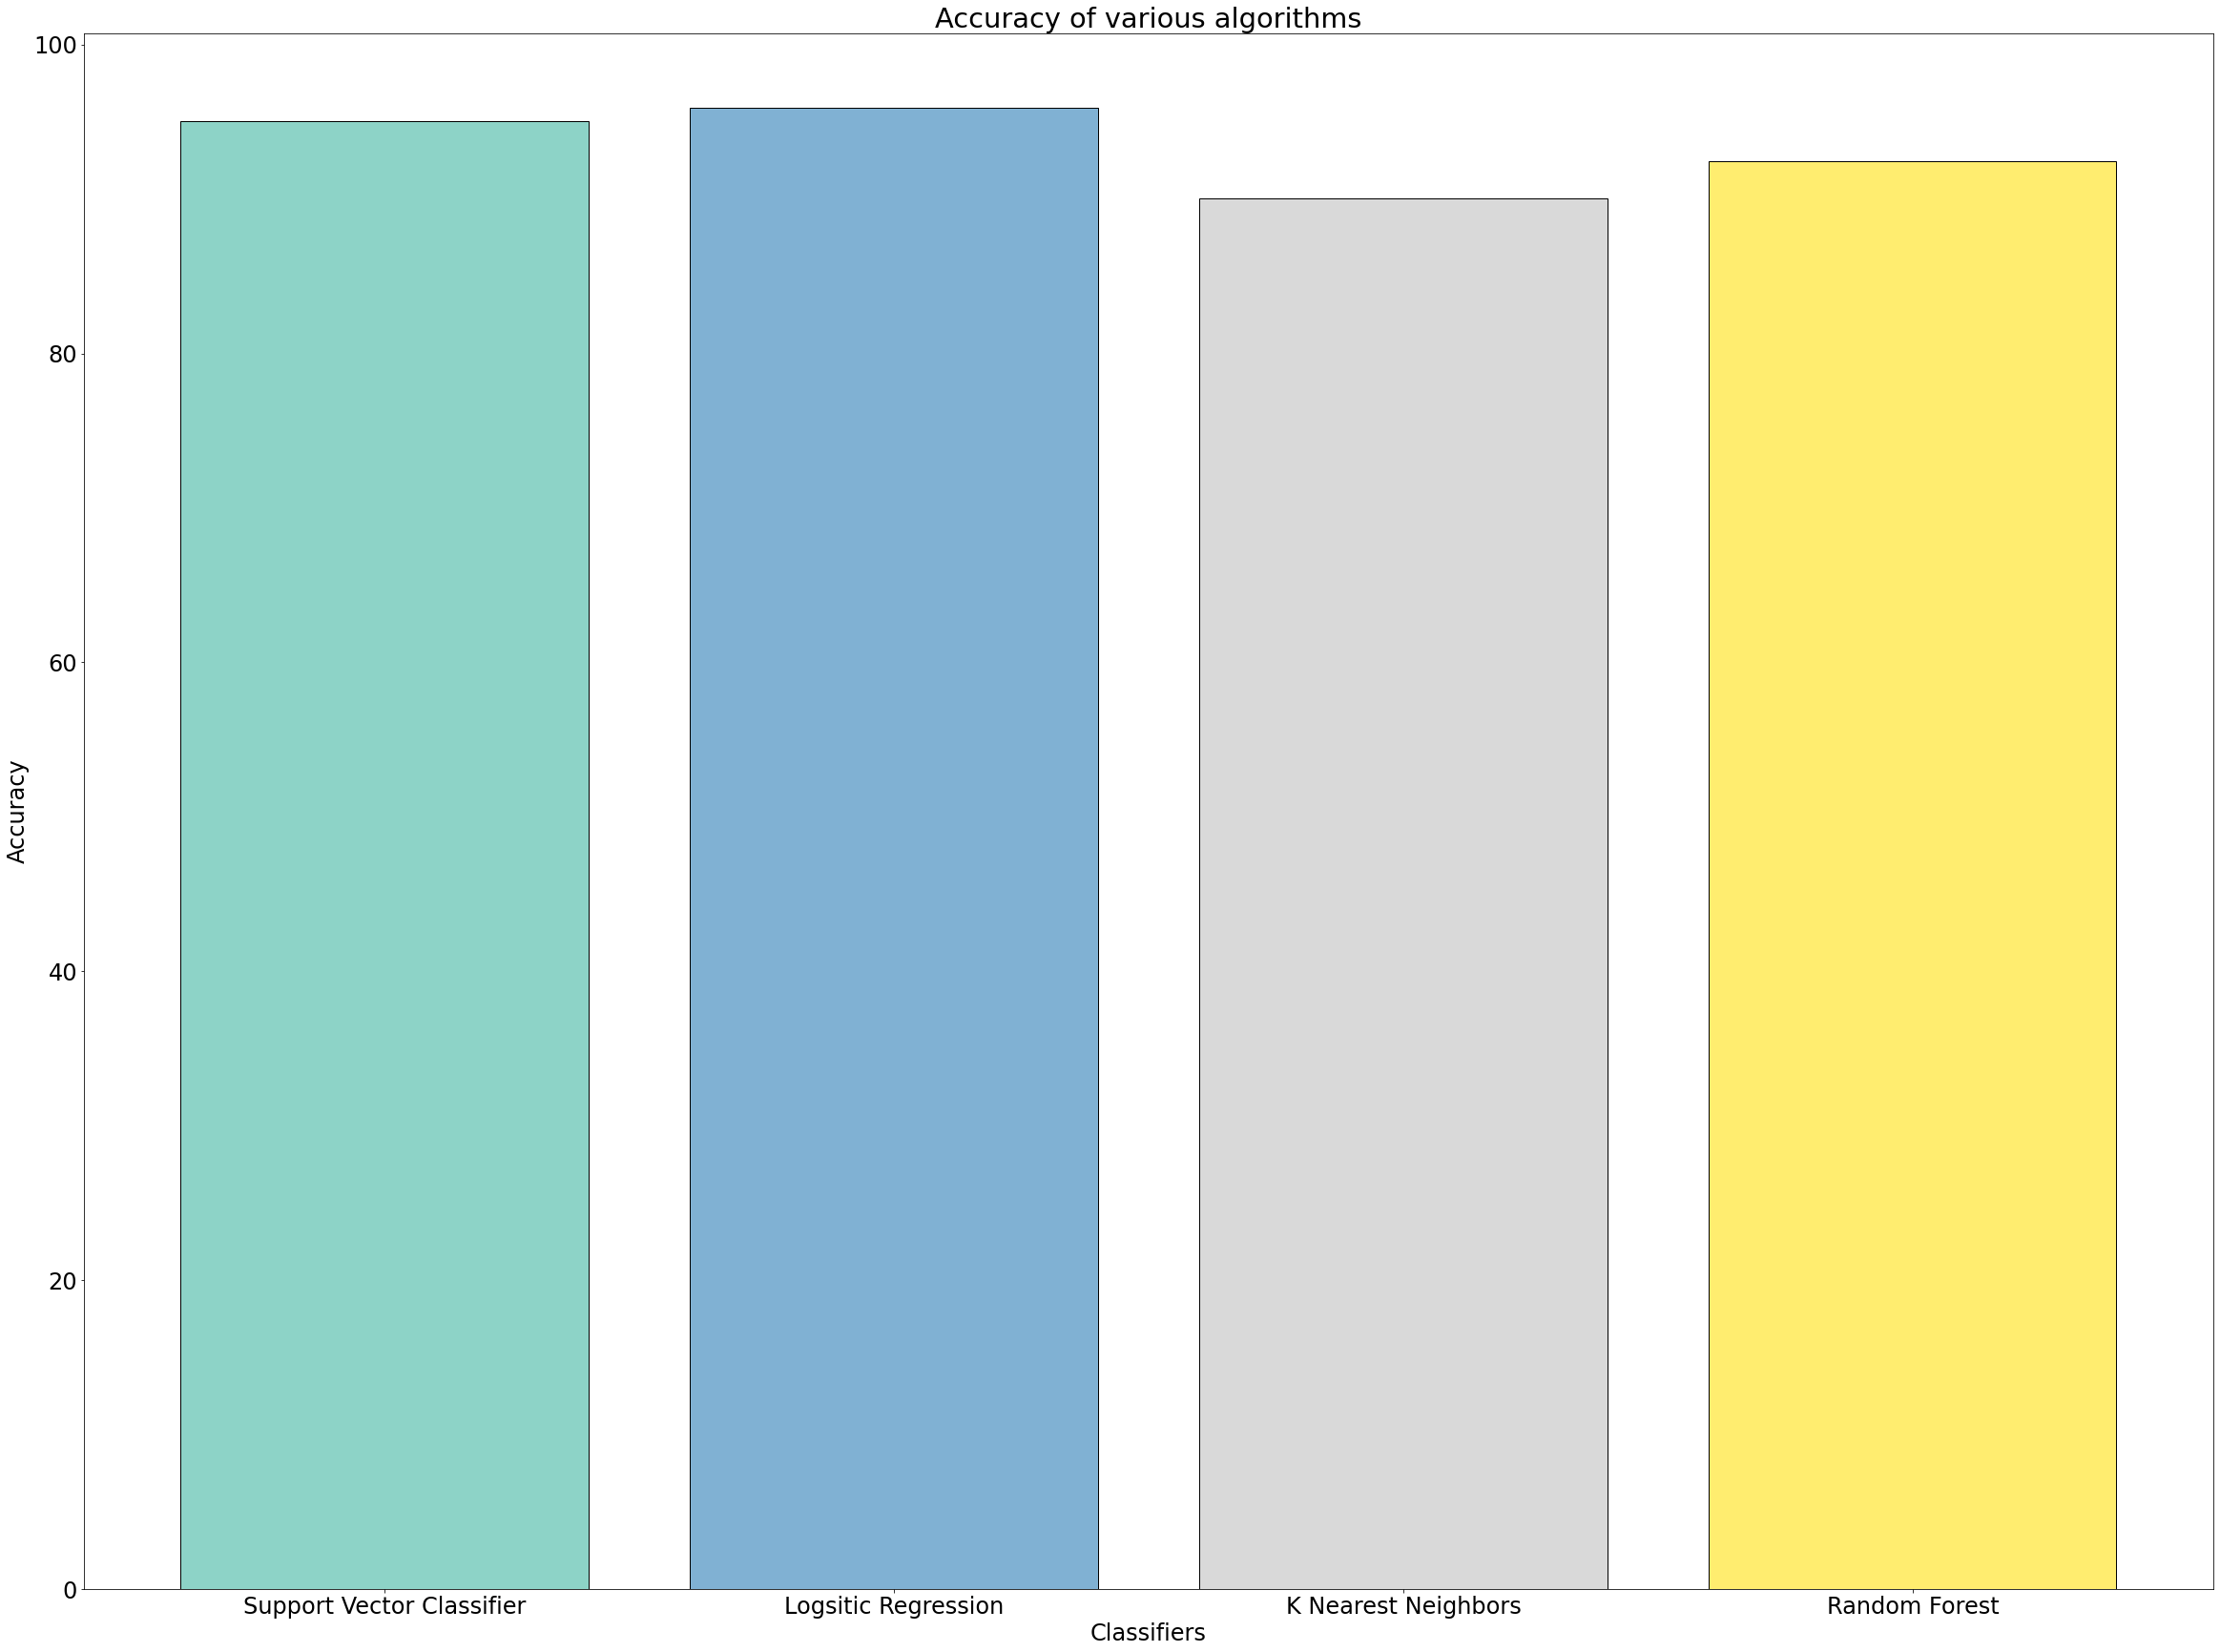

In [31]:
colors = cm.Set3(np.linspace(0,1,4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors,edgecolor='black')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')